# Plant Disease Classification using VGG16

In [60]:
import numpy as np
import keras,os
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import itertools
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(f'TensorFlow Version: {tf.__version__}')

TensorFlow Version: 2.13.0


## 1. Load and Preprocess Dataset

In [61]:

# train_gen = tf.keras.preprocessing.image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
#                                          image_size=(224, 224))
# test_gen = tf.keras.preprocessing.image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
#                                         image_size=(224, 224))

trdata = ImageDataGenerator()
train_data = trdata.flow_from_directory(directory="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",target_size=(224,224))
tsdata = ImageDataGenerator()
test_data = tsdata.flow_from_directory(directory="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size=(224,224))

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [62]:
# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

## 2. Build the Model using VGG16

In [63]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 
 
# Create a new model 
model = Sequential() 
model.add(base_model) 
model.add(Flatten()) 
model.add(Dense(2177, activation='relu'))
model.add(Dense(38, activation='softmax'))


from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_22 (Flatten)        (None, 25088)             0         
                                                                 
 dense_58 (Dense)            (None, 2177)              54618753  
                                                                 
 dense_59 (Dense)            (None, 38)                82764     
                                                                 
Total params: 69416205 (264.80 MB)
Trainable params: 69416205 (264.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. Train the Model

In [ ]:

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=20,generator=train_data, validation_data=test_data, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

## 4. Evaluate the Model

550/550 [==============================] - 65s 117ms/step - loss: 0.4535 - accuracy: 0.8546
Validation Loss: 0.45351359248161316
Validation Accuracy: 0.8545982241630554


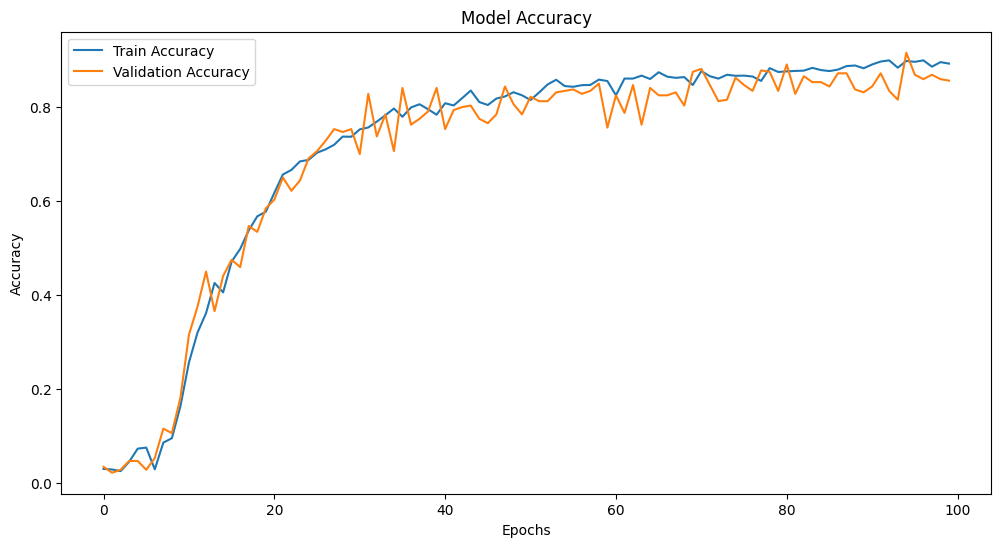

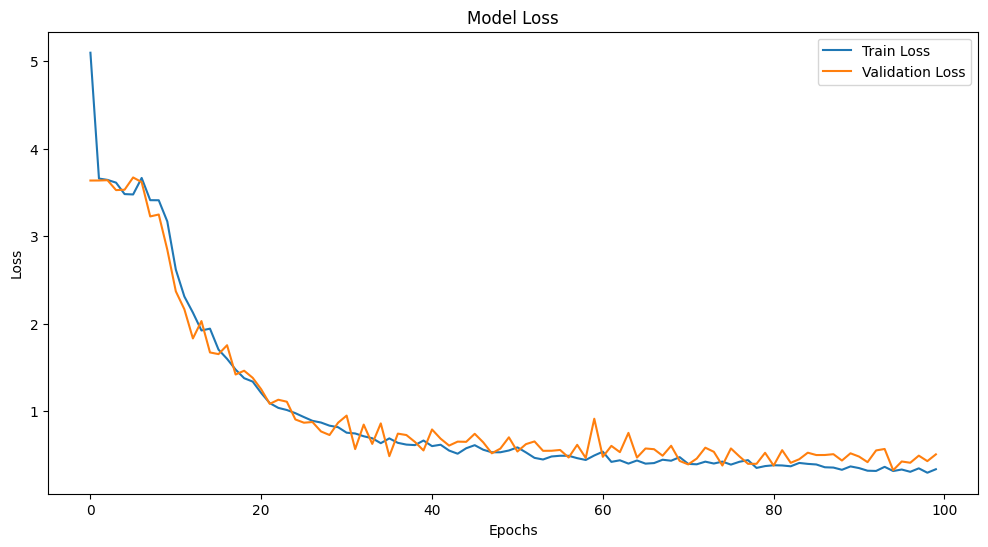

In [67]:

val_loss, val_acc = model.evaluate(test_data)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

plt.figure(figsize=(12, 6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()